In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
bureau = pd.read_csv("C:/final\home-credit-default-risk/bureau_balance.csv")

In [5]:
bureau_balance = bureau

In [6]:
bureau_balance.head(60)

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C
5,5715448,-5,C
6,5715448,-6,C
7,5715448,-7,C
8,5715448,-8,C
9,5715448,-9,0


In [7]:
bureau_balance.shape

(27299925, 3)

In [8]:
bureau_balance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27299925 entries, 0 to 27299924
Data columns (total 3 columns):
SK_ID_BUREAU      int64
MONTHS_BALANCE    int64
STATUS            object
dtypes: int64(2), object(1)
memory usage: 624.8+ MB


In [9]:
bureau_balance.isna().sum()

SK_ID_BUREAU      0
MONTHS_BALANCE    0
STATUS            0
dtype: int64

In [10]:
bureau_balance['STATUS'].unique()

array(['C', '0', 'X', '1', '2', '3', '5', '4'], dtype=object)

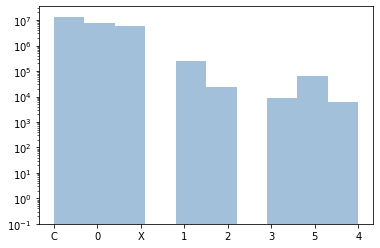

In [11]:
plt.hist(bureau_balance['STATUS'], bins=10, alpha=0.5,
        histtype='stepfilled', color='steelblue',
        edgecolor='none',log=True,);

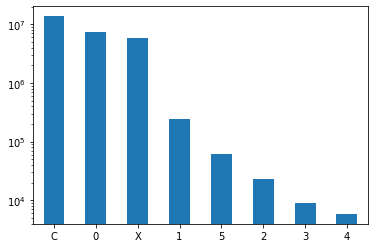

In [78]:
bureau_balance['STATUS'].value_counts().plot(kind='bar',rot=0,logy=True)

In [ ]:
#bureau_balance.plot()?

In [16]:
bsize = bureau_balance.groupby('STATUS').size()
bsize

STATUS
0     7499507
1      242347
2       23419
3        8924
4        5847
5       62406
C    13646993
X     5810482
dtype: int64

In [66]:
bsize = bureau_balance['STATUS'].value_counts()
bsize

C    13646993
0     7499507
X     5810482
1      242347
5       62406
2       23419
3        8924
4        5847
Name: STATUS, dtype: int64

In [17]:
bsize['X']/bureau_balance.shape[0] # unknown佔了21%

0.212838753220018

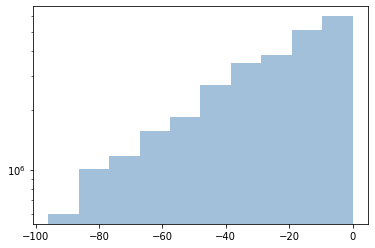

In [14]:
plt.hist(bureau_balance['MONTHS_BALANCE'], bins=10, alpha=0.5,
        histtype='barstacked', color='steelblue',
        edgecolor='none',log=True,);

In [18]:
bureau = pd.read_csv("C:/final\home-credit-default-risk/bureau.csv")

In [19]:
 bureau_balance['SK_ID_BUREAU'].unique().shape[0]

817395

In [20]:
(bureau_balance.groupby('SK_ID_BUREAU')['MONTHS_BALANCE'].max() == 0).sum()/817395 # 約23%沒有記錄到最近期

0.7474538014056852

In [21]:
(bureau_balance.groupby('SK_ID_BUREAU')['MONTHS_BALANCE'].max() == -1).sum()/817395 # -1 means the freshest balance date

0.0205775665375981

In [22]:
mb = bureau_balance.groupby('SK_ID_BUREAU')['MONTHS_BALANCE'].min()
mb

SK_ID_BUREAU
5001709   -96
5001710   -82
5001711    -3
5001712   -18
5001713   -21
           ..
6842884   -47
6842885   -23
6842886   -32
6842887   -36
6842888   -61
Name: MONTHS_BALANCE, Length: 817395, dtype: int64

In [36]:
dc = bureau[['SK_ID_BUREAU','DAYS_CREDIT']] # 此表與上表有強烈相關，所以接下來合併看
dc

,SK_ID_BUREAU,DAYS_CREDIT
0,5714462,-497
1,5714463,-208
2,5714464,-203
3,5714465,-203
4,5714466,-629
...,...,...
1716423,5057750,-44
1716424,5057754,-2648
1716425,5057762,-1809
1716426,5057770,-1878


In [37]:
dc.set_index('SK_ID_BUREAU',inplace=True) # 將dc表的id改為其中一欄
dc

,DAYS_CREDIT
SK_ID_BUREAU,
5714462,-497
5714463,-208
5714464,-203
5714465,-203
5714466,-629
...,...
5057750,-44
5057754,-2648
5057762,-1809


In [41]:
dcmb = pd.merge(dc,mb,how='outer',on='SK_ID_BUREAU').dropna(axis=0) # 合併兩表，並去除na
dcmb

,DAYS_CREDIT,MONTHS_BALANCE
SK_ID_BUREAU,,
5715448,-820.0,-26.0
5715449,-357.0,-11.0
5715451,-917.0,-30.0
5715452,-993.0,-32.0
5715453,-1146.0,-37.0
...,...,...
5053730,-456.0,-14.0
5053734,-1571.0,-51.0
5053740,-1234.0,-40.0


In [42]:
dcmb['D/M'] = dcmb['DAYS_CREDIT']/dcmb['MONTHS_BALANCE']
dcmb

,DAYS_CREDIT,MONTHS_BALANCE,D/M
SK_ID_BUREAU,,,
5715448,-820.0,-26.0,31.538462
5715449,-357.0,-11.0,32.454545
5715451,-917.0,-30.0,30.566667
5715452,-993.0,-32.0,31.031250
5715453,-1146.0,-37.0,30.972973
...,...,...,...
5053730,-456.0,-14.0,32.571429
5053734,-1571.0,-51.0,30.803922
5053740,-1234.0,-40.0,30.850000


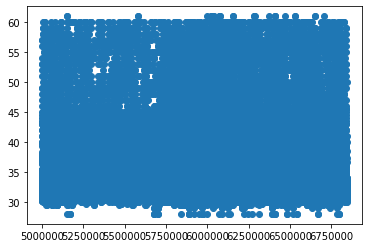

In [49]:
plt.plot(dcmb['D/M'],'o')

(array([0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 4.40000e+01, 1.64000e+02,
        4.61586e+05, 1.93496e+05, 4.91510e+04, 2.23590e+04, 1.21580e+04,
        7.67800e+03, 4.65600e+03, 3.39900e+03, 2.14100e+03, 2.10500e+03,
        1.33700e+03, 9.90000e+02, 1.03900e+03, 9.63000e+02, 9.01000e+02,
        6.95000e+02, 2.70000e+02, 2.74000e+02, 3.46000e+02, 3.13000e+02,
        2.92000e+02, 2.65000e+02, 2.78000e+02, 3.04000e+02, 2.57000e+02,
        2.91000e+02, 3.42000e+02, 3.43000e+02, 2.81000e+02, 2.09000e+02,
        2.16000e+02, 2.70000e+01, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00]),
 array([20., 21., 22., 23., 24., 25., 26., 27., 28., 29., 30., 31., 32.,
        33., 34., 35., 36., 37., 38., 39., 40., 4

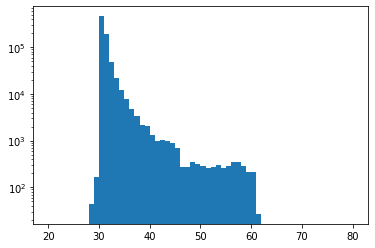

In [64]:
plt.hist(dcmb['D/M'],bins=60,range=[20,80],log=True) # month balance有部分沒有從最早開始記錄

In [33]:
bureau_balance.groupby(['SK_ID_BUREAU','STATUS']).count() # 可依ID，將各種狀態的次數加入bureau的表；但這樣沒有考慮到時間的遠近

MONTHS_BALANCE
SK_ID_BUREAU STATUS                
5001709      C                   86
             X                   11
5001710      0                    5
             C                   48
             X                   30
...                             ...
6842887      0                    6
             C                   31
6842888      0                    9
             1                    1
             C                   52

[1714229 rows x 1 columns]